In [7]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn wordcloud


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime


In [2]:
df = pd.read_csv('/home/kali/Desktop/git/Financial-News-and-Stock-Price-Integration/Data/raw_analyst_ratings.csv')
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


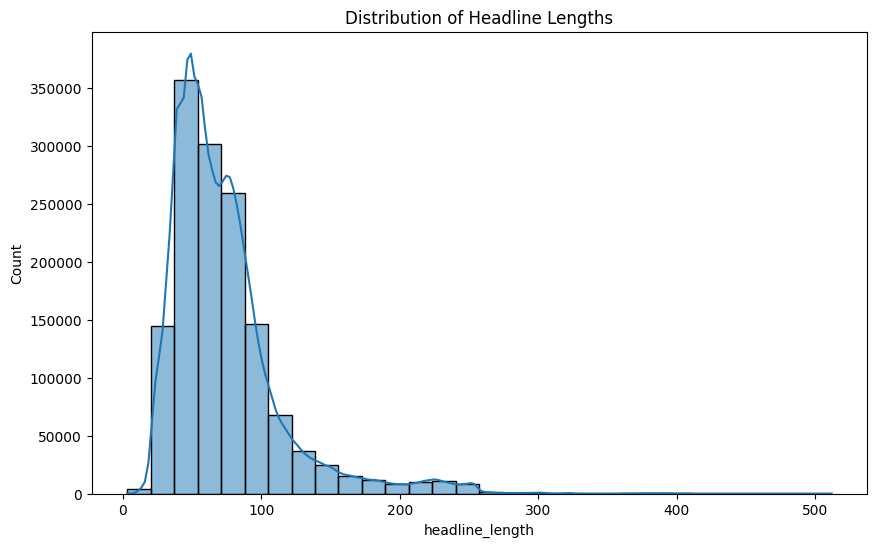

In [10]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.show()


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


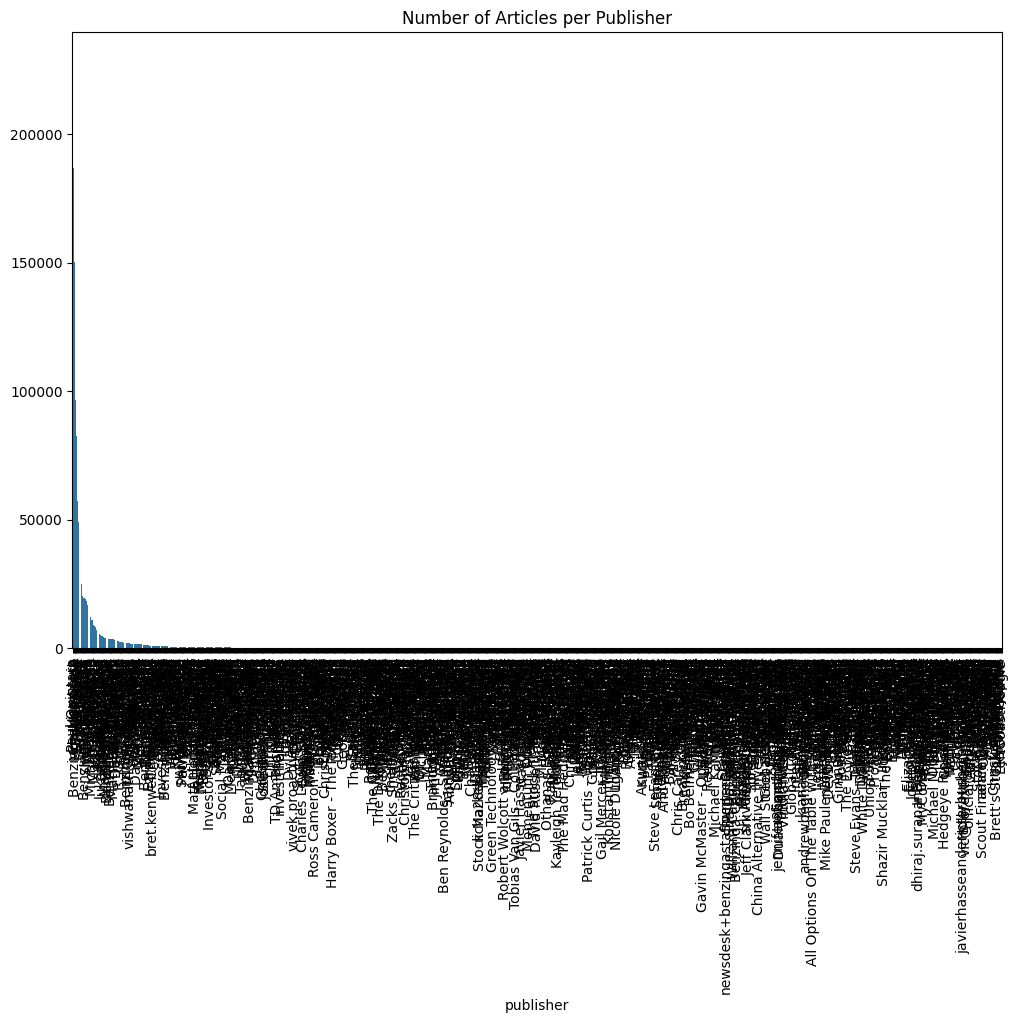

In [11]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

plt.figure(figsize=(12, 8))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.title('Number of Articles per Publisher')
plt.xticks(rotation=90)
plt.show()


In [13]:
df['publication_date'] = pd.to_datetime(df['publication_date'])
df['publication_day'] = df['publication_date'].dt.day_name()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='publication_day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Articles Published by Day of the Week')
plt.show()

df['publication_month'] = df['publication_date'].dt.to_period('M')
monthly_trend = df['publication_month'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
monthly_trend.plot(kind='line')
plt.title('Publication Trend Over Time')
plt.show()


KeyError: 'publication_date'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kali/nltk_data...


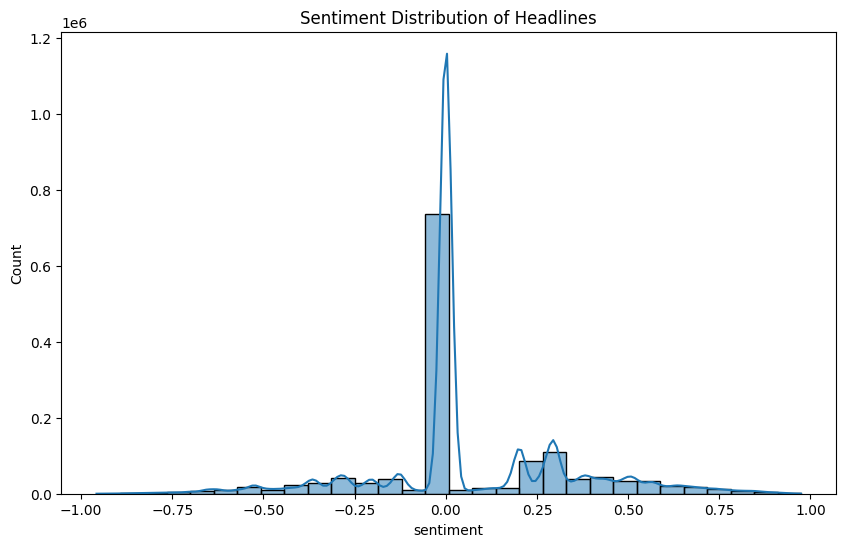

In [14]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['sentiment'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution of Headlines')
plt.show()


In [ ]:
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['headline'])

wordcloud = WordCloud(stopwords='english', background_color='white').generate(' '.join(df['headline']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
